<a href="https://colab.research.google.com/github/S5432/ML_Basic_Pipeline_Structure/blob/main/ML_Classification_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset = pd.read_csv("/content/Heart Prediction Quantum Dataset.csv")

In [3]:
dataset.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


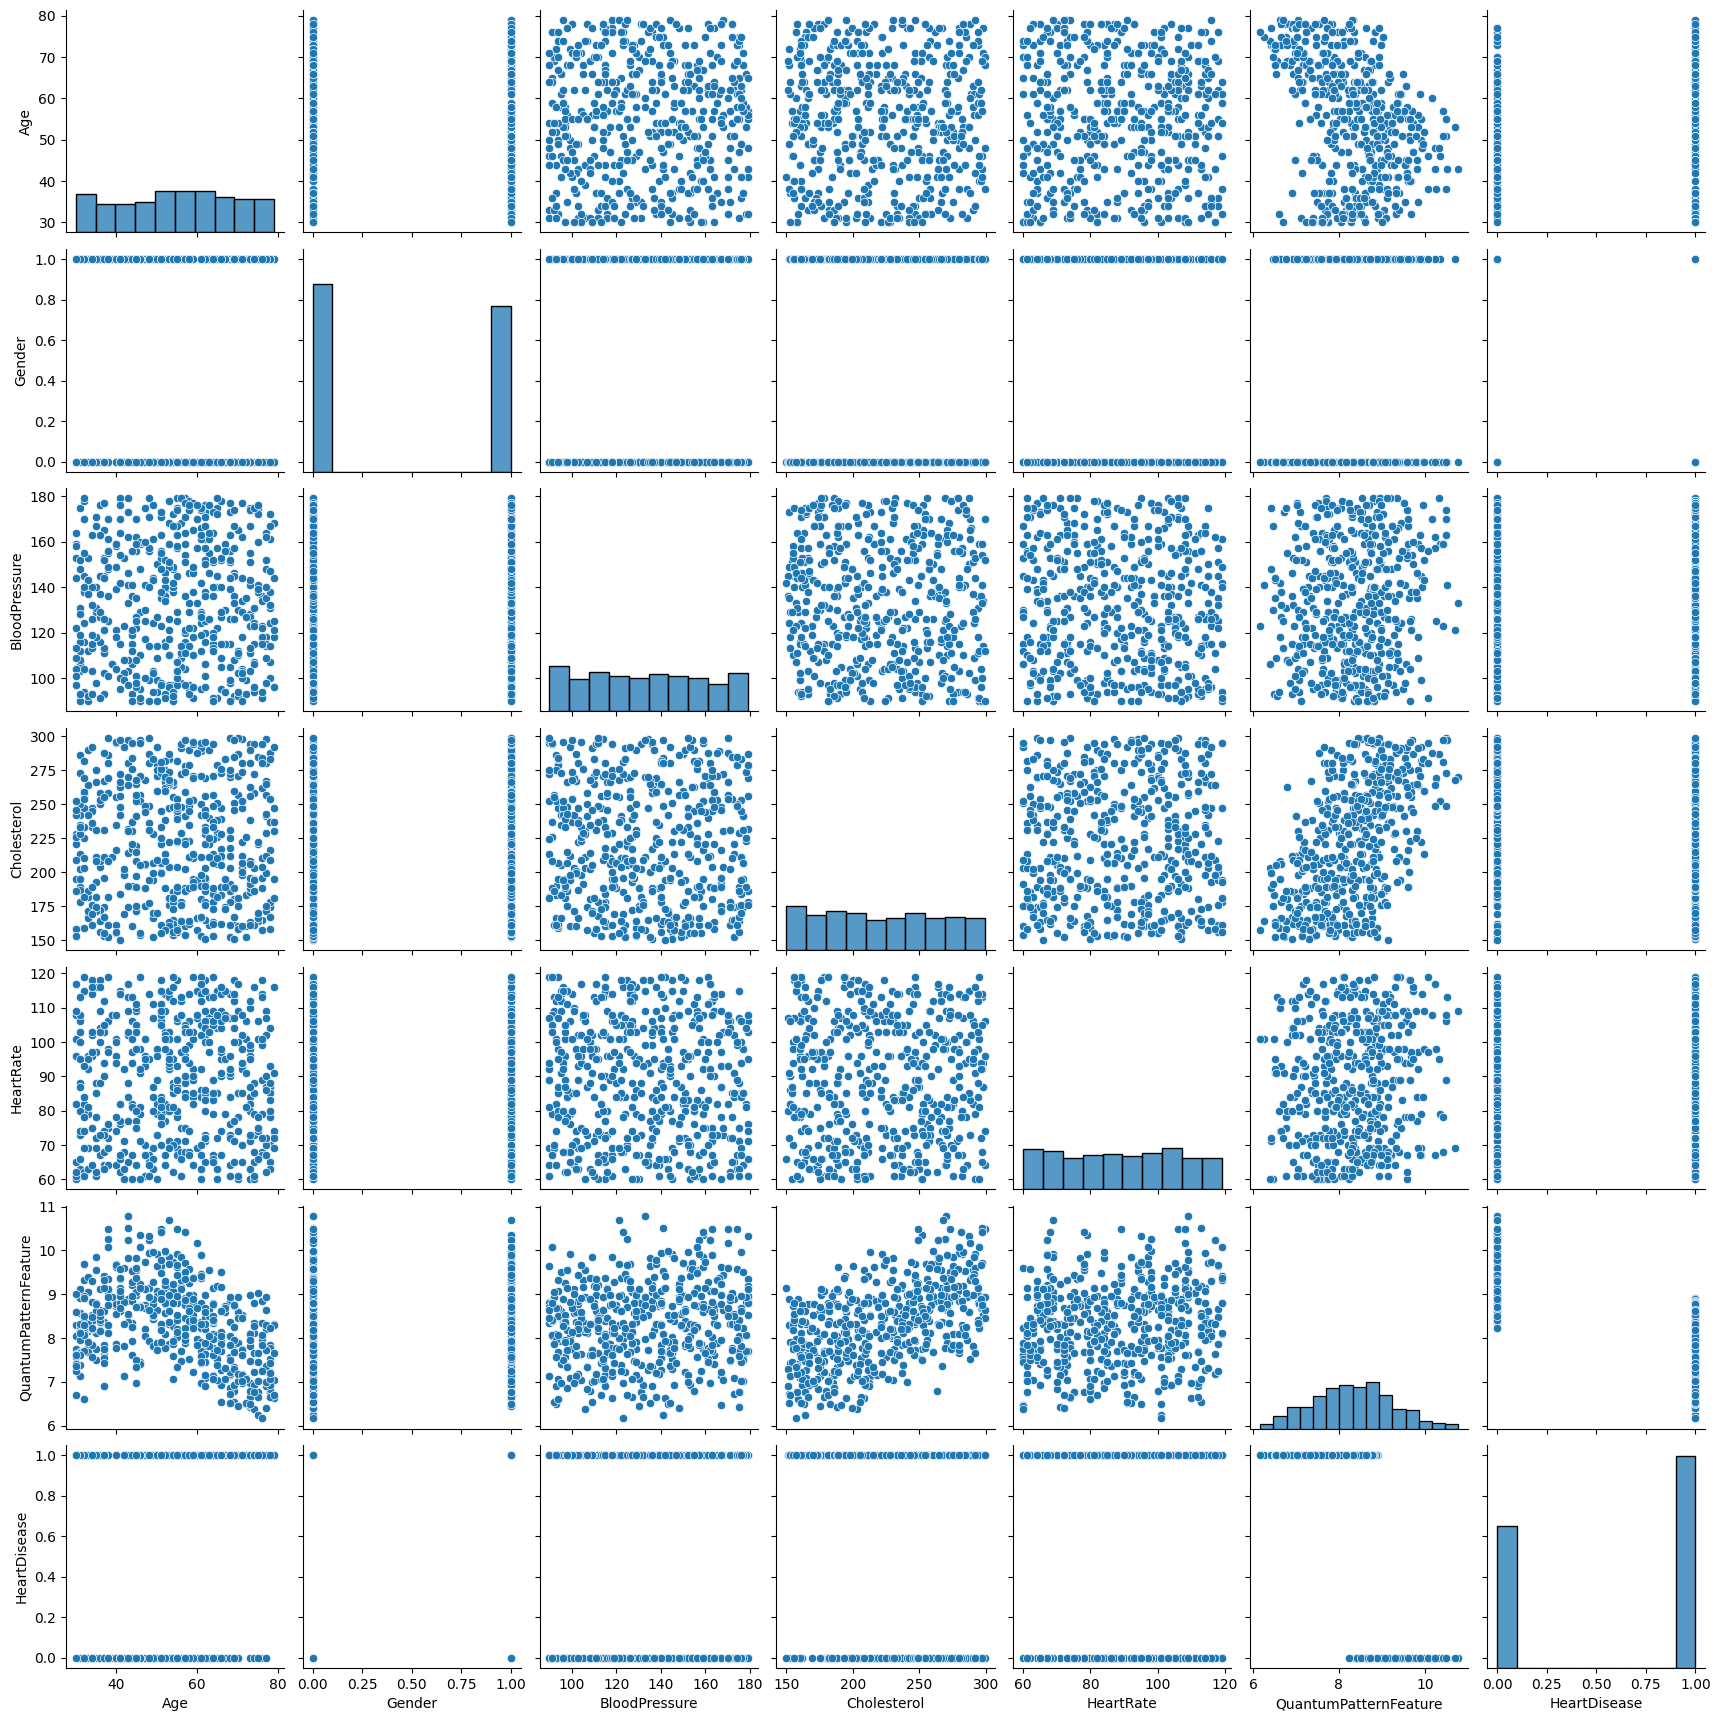

In [4]:
sns.pairplot(data = dataset)
plt.show()

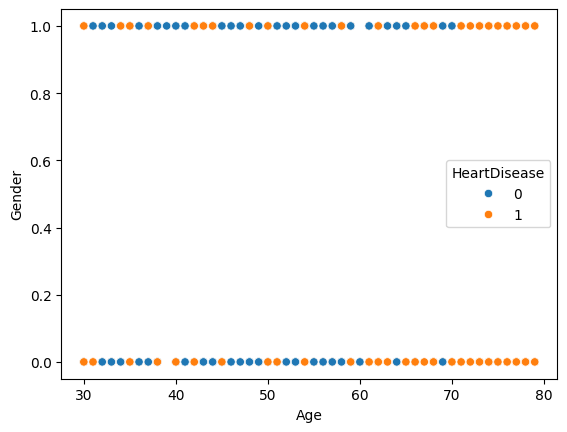

In [5]:
sns.scatterplot(x = 'Age', y = 'Gender', data = dataset, hue = 'HeartDisease')
plt.show()

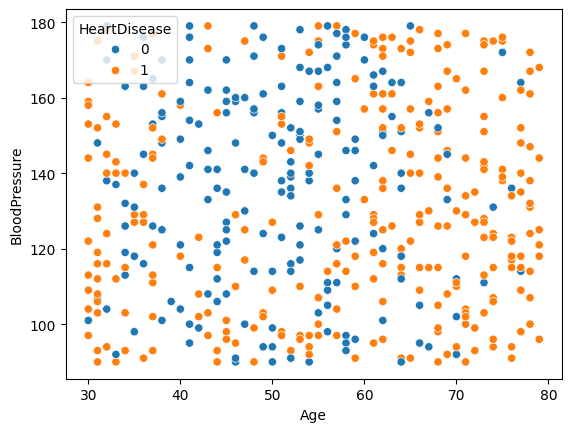

In [6]:
sns.scatterplot(x = 'Age', y = 'BloodPressure', data = dataset, hue = 'HeartDisease')
plt.show()

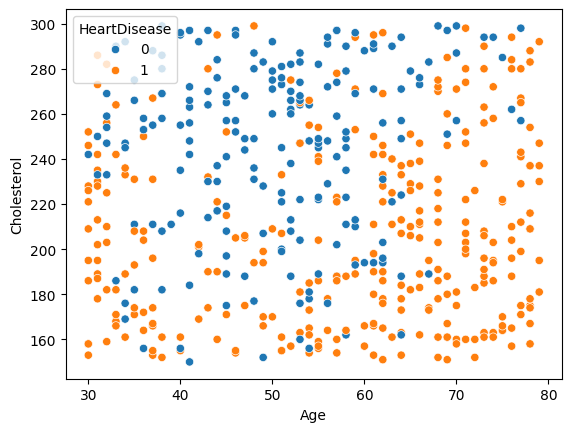

In [7]:
sns.scatterplot(x = 'Age', y = 'Cholesterol', data = dataset, hue = 'HeartDisease')
plt.show()

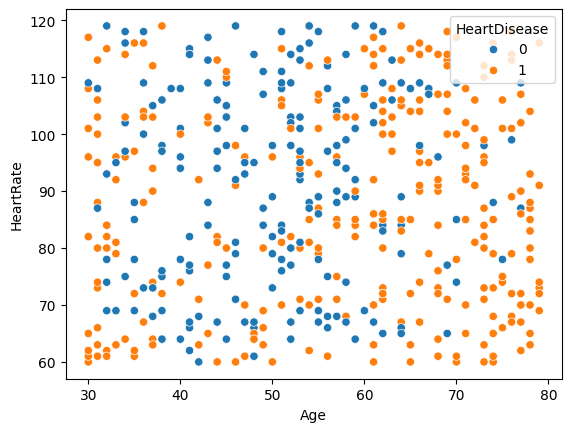

In [8]:
sns.scatterplot(x = 'Age', y = 'HeartRate', data = dataset, hue = 'HeartDisease')
plt.show()

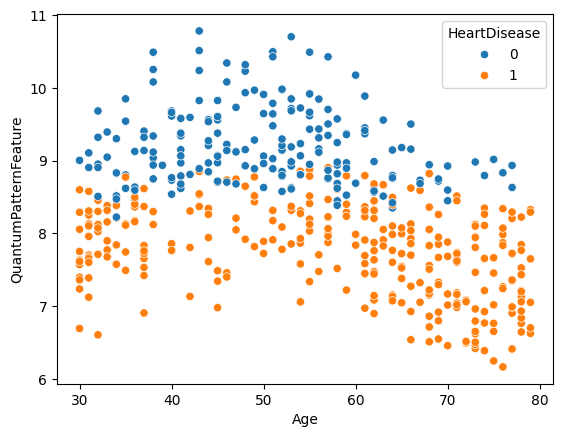

In [9]:
sns.scatterplot(x = 'Age', y = 'QuantumPatternFeature', data = dataset, hue = 'HeartDisease')
plt.show()

- Data Is Not Classified properly

In [10]:
# split the dataset
x = dataset.iloc[:,:-1]
y = dataset['HeartDisease']

In [11]:
# scalling the input data

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [12]:
sc.fit(x)

StandardScaler()

In [13]:
sc.transform(x)

array([[ 0.91855759,  1.06618579, -1.05615   , -0.69603327,  1.04793927,
         0.04880027],
       [ 0.21929024, -0.93792284, -1.35927119,  0.62757098,  0.01344838,
         1.01402539],
       [-0.75968405, -0.93792284, -1.51083178, -0.71885403, -0.38885363,
        -0.40803503],
       ...,
       [-0.68975732,  1.06618579,  0.98991802, -1.06116548, -0.79115564,
         0.43680885],
       [ 0.00951004, -0.93792284, -0.9803697 , -1.47193921,  0.70310897,
        -1.06645064],
       [ 0.00951004, -0.93792284,  1.55827025,  0.62757098,  0.01344838,
         2.36804362]])

In [14]:
# Again convert into dataframe

x = pd.DataFrame(sc.transform(x), columns = x.columns)


In [15]:
x

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
0,0.918558,1.066186,-1.056150,-0.696033,1.047939,0.048800
1,0.219290,-0.937923,-1.359271,0.627571,0.013448,1.014025
2,-0.759684,-0.937923,-1.510832,-0.718854,-0.388854,-0.408035
3,1.198265,1.066186,-1.510832,-0.878599,0.703109,-1.983493
4,-1.249171,-0.937923,0.459456,-1.266552,0.818052,-0.722217
...,...,...,...,...,...,...
495,-1.458951,-0.937923,-0.260457,1.608864,1.565185,1.073240
496,-0.969464,-0.937923,1.179369,0.604750,1.450241,0.816887
497,-0.689757,1.066186,0.989918,-1.061165,-0.791156,0.436809
498,0.009510,-0.937923,-0.980370,-1.471939,0.703109,-1.066451


In [16]:
# spliting the dataset
from sklearn.model_selection import train_test_split



In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [19]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

In [20]:
lg.fit(x_train, y_train)

LogisticRegression()

In [21]:
lg.score(x_train, y_train)*100

92.75

In [22]:
lg.score(x_test,y_test)*100

95.0

In [24]:
lg_prd = lg.predict(x_test)

In [25]:
lg_prd

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

In [30]:
cf = confusion_matrix(y_test, lg_prd)

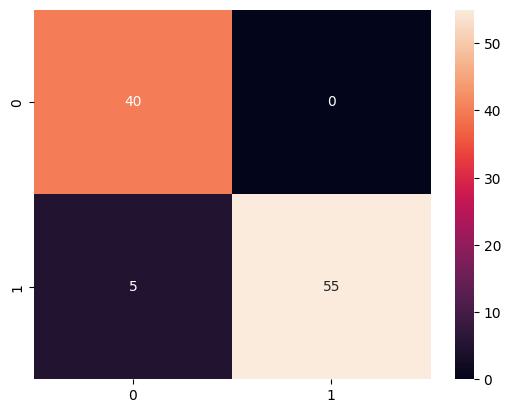

In [31]:
sns.heatmap(cf, annot = True)
plt.show()

In [32]:
precision_score(y_test, lg_prd)

1.0

In [33]:
recall_score(y_test, lg_prd)

0.9166666666666666

In [34]:
f1_score(y_test, lg_prd)

0.9565217391304348

In [37]:
accuracy_score(y_test, lg_prd)

0.95

# Decision Tree

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
dataset = pd.read_csv('/content/Heart Prediction Quantum Dataset.csv')
dataset.head()

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [40]:
dataset.shape

(500, 7)

In [41]:
dataset.isnull().sum()

,0
Age,0
Gender,0
BloodPressure,0
Cholesterol,0
HeartRate,0
QuantumPatternFeature,0
HeartDisease,0


In [45]:
dataset['HeartDisease'].value_counts()

,count
HeartDisease,
1,300
0,200


## Handling Imbalance dataset

In [46]:
from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler()

In [47]:
x = dataset.iloc[:,:-1]
y = dataset['HeartDisease']

In [48]:
ro.fit(x,y)

RandomOverSampler()

In [51]:
ro_x, ro_y = ro.fit_resample(x,y)

In [52]:
ro_x,ro_y

(     Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature
 0     68       1            105          191        107               8.362241
 1     58       0             97          249         89               9.249002
 2     44       0             93          190         82               7.942542
 3     72       1             93          183        101               6.495155
 4     37       0            145          166        103               7.653900
 ..   ...     ...            ...          ...        ...                    ...
 595   69       1            133          297         65               8.748671
 596   57       1            154          297        105               9.706210
 597   56       0            111          294        112               9.163187
 598   38       1            101          269         64               9.119106
 599   42       0            153          292         60               9.595764
 
 [600 rows x 6 columns],
 0      1
 1 

In [53]:
ro_y.value_counts()

,count
HeartDisease,
1,300
0,300


In [58]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [63]:
sc.fit_transform(ro_x)

array([[ 1.00843559,  1.08347268, -1.0759617 , -0.79366722,  1.02562231,
        -0.10805   ],
       [ 0.29221713, -0.92295821, -1.38101876,  0.52645606, -0.01035982,
         0.85185005],
       [-0.71048871, -0.92295821, -1.5335473 , -0.81642797, -0.41324176,
        -0.56236498],
       ...,
       [ 0.14897344, -0.92295821, -0.8471689 ,  1.55068964,  1.31339513,
         0.75895748],
       [-1.14021978,  1.08347268, -1.22849023,  0.98167098, -1.44922389,
         0.71124046],
       [-0.8537324 , -0.92295821,  0.7543807 ,  1.50516815, -1.67944215,
         1.22721311]])

In [64]:
# Again convert into dataframe

ro_x = pd.DataFrame(sc.fit_transform(ro_x), columns = ro_x.columns)

In [65]:
ro_x

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
0,1.008436,1.083473,-1.075962,-0.793667,1.025622,-0.108050
1,0.292217,-0.922958,-1.381019,0.526456,-0.010360,0.851850
2,-0.710489,-0.922958,-1.533547,-0.816428,-0.413242,-0.562365
3,1.294923,1.083473,-1.533547,-0.975753,0.680295,-2.129131
4,-1.211842,-0.922958,0.449324,-1.362686,0.795404,-0.874814
...,...,...,...,...,...,...
595,1.080057,1.083473,-0.008262,1.618972,-1.391669,0.310253
596,0.220595,1.083473,0.792513,1.618972,0.910513,1.346769
597,0.148973,-0.922958,-0.847169,1.550690,1.313395,0.758957
598,-1.140220,1.083473,-1.228490,0.981671,-1.449224,0.711240


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(ro_x, ro_y, test_size= 0.2, random_state = 42)

In [67]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

In [69]:
x_train

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature
145,-1.140220,1.083473,-1.228490,0.981671,-1.449224,0.711240
9,-0.996976,1.083473,-0.465848,0.663021,0.392522,1.322510
375,0.578705,-0.922958,0.639984,0.116763,-0.355687,0.131215
523,-1.283463,1.083473,1.631420,0.617499,0.622740,0.189975
188,1.151679,-0.922958,1.211966,1.027192,0.622740,-0.628410
...,...,...,...,...,...,...
71,0.077352,-0.922958,1.135702,-0.497778,-1.046342,-0.463513
106,-0.996976,-0.922958,0.983174,1.573450,0.680295,0.329783
270,0.435461,-0.922958,0.906909,-1.362686,1.025622,-0.673910
435,1.294923,-0.922958,0.068002,-1.681336,0.104749,-2.106874


In [70]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [120]:
dtc.score(x_train,y_train)*100

100.0

In [72]:
dtc.score(x_test, y_test)*100

88.33333333333333

In [73]:
dtc_prd = dtc.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [75]:
cf = confusion_matrix(y_test, dtc_prd)

In [76]:
cf

array([[53,  4],
       [10, 53]])

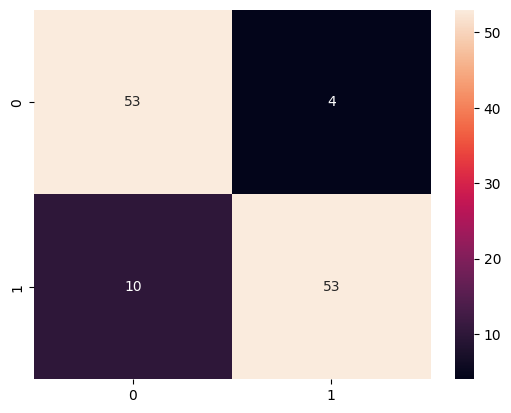

In [78]:
sns.heatmap(cf, annot = True)
plt.show()

In [79]:
precision_score(y_test, dtc_prd)

0.9298245614035088

In [80]:
recall_score(y_test, dtc_prd)

0.8412698412698413

In [81]:
f1_score(y_test, dtc_prd)

0.8833333333333333

In [82]:
accuracy_score(y_test, dtc_prd)

0.8833333333333333

# HYperparameter Tunning

In [121]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

In [137]:
# Create the DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)



# Define the hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],               # Criterion for measuring quality of split
    'max_depth': [None, 10, 20, 30],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                   # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],          # Number of features to consider for the best split
    'max_leaf_nodes': [None, 10, 20],                # Maximum number of leaf nodes
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model using GridSearchCV
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [128]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [129]:
grid_search.best_score_

np.float64(0.9333333333333333)

In [ ]:
grid_search.cv_results_

In [133]:
grid_search.best_index_

np.int64(324)

In [131]:
# loading the result to the pandas DataFrame.

result = pd.DataFrame(grid_search.cv_results_)

result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011346,0.003884,0.006779,0.003765,gini,None,None,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.906250,0.927083,0.958333,0.854167,0.937500,0.916667,0.035478,273
1,0.013692,0.003464,0.004439,0.001799,gini,None,None,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.906250,0.916667,0.958333,0.854167,0.937500,0.914583,0.035109,345
2,0.008993,0.003981,0.003635,0.000943,gini,None,None,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.906250,0.927083,0.937500,0.864583,0.927083,0.912500,0.026021,370
3,0.010599,0.005334,0.006581,0.004759,gini,None,None,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.916667,0.916667,0.875000,0.864583,0.916667,0.897917,0.023199,629
4,0.008926,0.004481,0.003044,0.000189,gini,None,None,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.947917,0.916667,0.885417,0.864583,0.916667,0.906250,0.028717,495


# SVM Classifier

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(ro_x, ro_y, test_size= 0.2, random_state = 42)

In [85]:
from sklearn.svm import SVC

In [87]:
sv = SVC(kernel='linear')

In [88]:
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [134]:
sv.score(x_train, y_train)*100

94.375

In [90]:
sv.score(x_test, y_test)*100

90.83333333333333

In [92]:
sv_prd = sv.predict(x_test)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score

In [93]:
cf = confusion_matrix(y_test, sv_prd)

In [94]:
cf

array([[53,  4],
       [ 7, 56]])

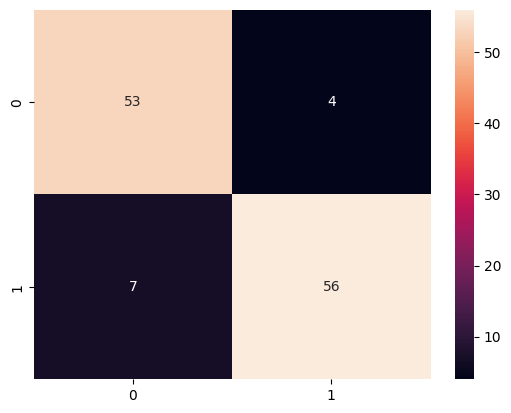

In [96]:
sns.heatmap(cf, annot=True)
plt.show()

In [97]:
accuracy_score(y_test, sv_prd)

0.9083333333333333

In [98]:
precision_score(y_test, sv_prd)

0.9333333333333333

In [99]:
recall_score(y_test, sv_prd)

0.8888888888888888

In [100]:
f1_score(y_test, sv_prd)

0.9105691056910569